## Data Analysis and Visualization in Pandas and Matplotlib ##

This is our Data Visualization in Python Jupyter Notebook. We will learn to use the Pandas and Matplotlib libraries to take our data and do some data visualizations with it. 

The first thing we need to do is learn some background information about the libraries and technologies we will be using. Because we are all using the Anaconda software distribution today, Anaconda comes with a lot of functionality installed on top of the base python libraries. This includes the pandas and matplotlib packages as well as the JupyterLab/Jupyter Notebook Environment.

## JupyterLab/Jupyter Notebooks ##

[Project Jupyter Homepage](https://jupyter.org/)

The Jupyter environment is a web-based interactive computational environment for creating notebook-like documents. It supports several languages like python, R, Julia, etc. JupyterLab is the next generation user interface, which includes Jupyter Notebooks.

In my opinion, they seem almost exactly the same but I'm sure people embedded within the development of the project would tell you differently.

Think of the Jupyter environment as an interactive blog post. As you'll see, Jupyter allows you to show your code and explain it in a very neat, easy to follow way. Each cell either contains text (like this one) or code. When writing code, each cell basically functions like the command line or console. And as you'll see, each cell is LIVE and you can change your code on the fly. 

Jupyter really excels in situations like this class where we will be walking through a topic step by step. I can explain things, you can play with the code, and it is easy for everyone to see. 

<strong>1.</strong> Let's get started by importing the libraries we will be using. I will explain these later as we go. Because we are all using Anaconda, all of these libraries are already installed.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt     #I am pretty sure pyplot is the original functionality of matplotlib
import matplotlib.ticker as ticker
import numpy as np


<strong> 2. </strong> First we need to read in some data, so we can then work with it. This is a CSV sheet of career stats for professional baseball player, Mike Trout. Baseball is a numbers game so this gives us a nice, easy to use dataset to work use.

In [4]:
df = pd.read_csv("MikeTroutData.csv")

## Pandas ##

[Pandas Documentation](https://pandas.pydata.org/)

Pandas is an open source python library providing high-performance, easy-to-use data structures and data analysis tools. We will be using pandas to work with our data before feeding it into Matplotlib. Pandas can read from and write to many different data formats. It is intelligent in handling missing or bad data. You can easily reshape or pivot your data. It is optimized for performance. And it has a massive international user community so help and examples are readily available. 

## Pandas Dataframes ##

The aforementioned easy to use data structure in pandas is called a [pandas dataframe](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#dataframe). This is a tabular or spreadsheet-like view of your data, just as you'd see it in Excel. A pandas dataframe is a 2-dimensional labeled data structure with columns and rows. It is the most commonly used pandas object. Each one dimensional row or column is called a [pandas series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) Along with the data, you can pass index (row labels) or columns as arguments. 

<strong> 3. </strong> Let's take a look at our data

In [5]:
print(df)

   Year  Age    G   AB    R    H  HR     BA    Salary  Awards
0  2011   19   40  123   20   27   5  0.220     36000       0
1  2012   20  139  559  129  182  30  0.326    492500       4
2  2013   21  157  589  109  190  27  0.323    510000       3
3  2014   22  157  602  115  173  36  0.287   1000000       3
4  2015   23  159  575  104  172  41  0.299   6083000       3
5  2016   24  159  549  123  173  29  0.315  16083000       3
6  2017   25  114  402   92  123  33  0.306  20083000       2
7  2018   26  140  471  101  147  39  0.312  34083000       3
8  2019   27  134  470  110  137  45  0.291  36833333       1


<strong> 4. </strong> We will want to slice and dice the data so let's see how to access the data by it's column header. 

In [6]:
print(df.keys())     #a built in .keys() function
print()
print(df.columns.tolist())   # see the data in a list
print()
print(df['Year'])      #access an individual column using a dictionary syntax  (This is what I prefer)
print()
print(df.AB)           #access a column using the name as an attribute of the dataframe

Index(['Year', 'Age', 'G', 'AB', 'R', 'H', 'HR', 'BA', 'Salary', 'Awards'], dtype='object')

['Year', 'Age', 'G', 'AB', 'R', 'H', 'HR', 'BA', 'Salary', 'Awards']

0    2011
1    2012
2    2013
3    2014
4    2015
5    2016
6    2017
7    2018
8    2019
Name: Year, dtype: int64

0    123
1    559
2    589
3    602
4    575
5    549
6    402
7    471
8    470
Name: AB, dtype: int64


<strong> 5. </strong> I am renaming some of the columns we will be using, just for the sake of simplicity. It is easier to refer to these variable names than the entire syntax of each column.

In [7]:
year = df['Year']
hits = df['H']
at_bats = df['AB']
home_runs = df['HR']
salary = df['Salary']

<strong> 6. </strong> I can now use these variable names just like any other object

In [8]:
print(at_bats)

0    123
1    559
2    589
3    602
4    575
5    549
6    402
7    471
8    470
Name: AB, dtype: int64


<strong> 7. </strong> We can also create new columns. We will start with a blank one. 

In [9]:
df['new_column'] = np.nan

In [10]:
print(df['new_column'])

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
Name: new_column, dtype: float64


<strong> 8. </strong> We can delete columns. I'll delete the nonsense column I just created, but more commonly this is used to clean your datasets of extraneous data

In [11]:
del df['new_column']

In [12]:
print(df['new_column'])      #this will result in an error

KeyError: 'new_column'

<strong> 9. </strong> So far, we have only used our columns to access data and neglected rows. Rows are indexed starting at 0. If you think of other python objects, such as lists, the same concept applies. So the first row in the data would be in position 0 (the header row is excluded and treated separately).

Accessing rows in pandas is done using the .loc() and .iloc() functions and is slightly more involved than just using the column header to access data. We will start with .iloc(). 

In [13]:
print(df.iloc[:5])    #prints first 5 rows of data, notice the index row to the left of the data

   Year  Age    G   AB    R    H  HR     BA   Salary  Awards
0  2011   19   40  123   20   27   5  0.220    36000       0
1  2012   20  139  559  129  182  30  0.326   492500       4
2  2013   21  157  589  109  190  27  0.323   510000       3
3  2014   22  157  602  115  173  36  0.287  1000000       3
4  2015   23  159  575  104  172  41  0.299  6083000       3


<strong> 10. </strong> You can do slicing and similar operations just as you would with a python list using the .loc() function

In [14]:
print(df.iloc[2:3])      #prints only row at index 2  
print()
print(df.iloc[5:])     #prints everything row 5 and up

   Year  Age    G   AB    R    H  HR     BA  Salary  Awards
2  2013   21  157  589  109  190  27  0.323  510000       3

   Year  Age    G   AB    R    H  HR     BA    Salary  Awards
5  2016   24  159  549  123  173  29  0.315  16083000       3
6  2017   25  114  402   92  123  33  0.306  20083000       2
7  2018   26  140  471  101  147  39  0.312  34083000       3
8  2019   27  134  470  110  137  45  0.291  36833333       1


<strong> 11. </strong> The .loc() functions works somewhat counterintuitively but makes sense once you get the hang of it. Basically, you are accessing a row based on the value located in a column. See the following examples.

In [15]:
young_age = df.loc[df['Age'] < 22]

print(young_age)

   Year  Age    G   AB    R    H  HR     BA  Salary  Awards
0  2011   19   40  123   20   27   5  0.220   36000       0
1  2012   20  139  559  129  182  30  0.326  492500       4
2  2013   21  157  589  109  190  27  0.323  510000       3


<strong> 12. </strong> So you see above, I have effectively located the data for rows in which the column value is less than 22. Let's do another example.

In [16]:
high_batting_average = df.loc[df['BA'] > .320]

print(high_batting_average)

   Year  Age    G   AB    R    H  HR     BA  Salary  Awards
1  2012   20  139  559  129  182  30  0.326  492500       4
2  2013   21  157  589  109  190  27  0.323  510000       3


<strong> 13. </strong> One more example, let's create a new column and write data to it using a .loc() statement. We can actually do this all in one statement which I'll first show you and then explain. 

In [17]:
df.loc[df['BA'] > .320, 'High Batting Average'] = 'Yes'

example = df[['BA', 'High Batting Average']]
print(example)

      BA High Batting Average
0  0.220                  NaN
1  0.326                  Yes
2  0.323                  Yes
3  0.287                  NaN
4  0.299                  NaN
5  0.315                  NaN
6  0.306                  NaN
7  0.312                  NaN
8  0.291                  NaN


<strong> 14. </strong> The above statement is a little more complicated. But as you can see, the first part is what we already did above. I selected rows with a batting average of > .320.  The second argument of this statement actually gives a name to the new column ('High Batting Average') and then populates it with the value of 'Yes' if the statement is true. So the interpreter iterates through each row of the dataframe to evaluate this statement. If it is true, the value 'Yes' is written to the new column. 


Pandas selection statements can get very tedious and there are endless variations and much more functionality than I have demonstrated. But for now, let's move on to visualizing the data.

## Data Visualization ##

Finally, we get to the point where we can see our data in other ways than just a tabular format! Luckily for us, there are many data visualization libraries available in python. We will learn about just a few of the major ones, in particular Matplotlib. 

## Matplotlib ##

[Matplotlib documentation](https://matplotlib.org/)

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.
Matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code. It integrates very nicely with Pandas, NumPy, and other related libraries.

From [MatPlotLib's Wikipedia page](https://en.wikipedia.org/wiki/Matplotlib): Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications


## Bar Plots

<strong> 15. </strong> Let's get to it! This is a very simple plot of Mike Trout's hits per year. As you can see, I am using objects I already defined previously. Specifically these objects are columns from the Mike Trout stats dataframe (df). Previously I had defined the specific columns as their own variable name (year and hits). 

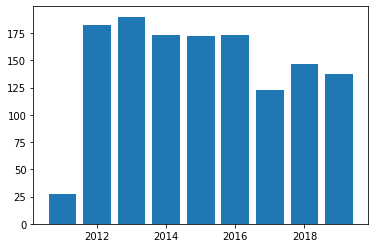

In [22]:
plt.bar(year, hits)
plt.show()

<strong> 16. </strong> So as you see, I've got # of Hits on the Y Axis, and Year on the X Axis. Matplotlib provides many functions to produce different charts and plots such as plt.bar() shown above. The plt.show() function is needed to show the plot in the jupyter notebooks/ipython environment. But what are the year and hits objects?

In [19]:
print(type(year))
print(type(hits))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


<strong> 17. </strong> As you see, these are pandas Series objects. Again, a series is a 1-Dimensional array of data. I'll be transforming my pandas dataframe to extract different series of objects, so I can plot them using matplotlib. You could also call these columns explicitly.


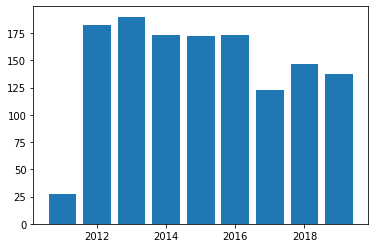

In [23]:
plt.bar(df['Year'], df['H'])
plt.show()

<strong> 18. </strong> Our first plot was as basic as it gets. Let's add some labels to make it look a little better.

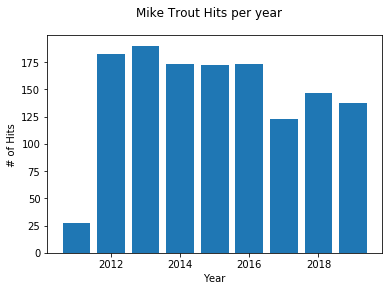

In [24]:
plt.xlabel('Year')
plt.ylabel('# of Hits')
plt.suptitle('Mike Trout Hits per year')
plt.bar(year, hits)
plt.show()

## Horizontal Bar Plots

<strong> 18. </strong> Let's turn our bar plot sideways. We do this using the plt.barh() function.

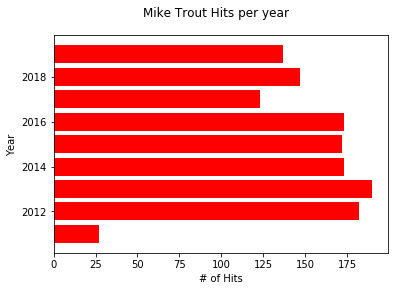

In [25]:

plt.xlabel('# of Hits')
plt.ylabel('Year')
plt.suptitle('Mike Trout Hits per year')
plt.barh(year, hits, color='red')       #notice I changed the color argument. Blue is the default color
plt.show()

## Line Plot

<strong> 19. </strong> We can also do simple line plots. Here is hits per year as a line plot.

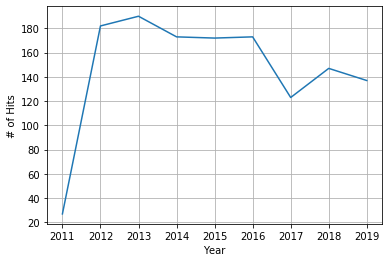

In [27]:
plt.xlabel('Year')
plt.ylabel('# of Hits')
plt.grid()                    #I added a background grid
plt.plot(year, hits)
plt.show()

## Combined plots

<strong> 20. </strong> You can also put them together. 
In this plot, I have the # of hits plotted in blue as a bar chart, and number of At Bats in red as a line graph. 

But notice, our old labels don't work anymore!

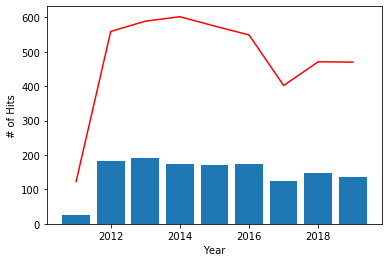

In [29]:
plt.xlabel('Year')
plt.ylabel('# of Hits')
plt.plot(year, at_bats, color='red')
plt.bar(year, hits)
plt.show()

## Legends

<strong> 21. </strong> A legend is probably the right thing to bring more clarity to our plot. This is a simple process. By adding a label argument to each plot function, the legend reads these. Lastly, the plt.legend() function is needed to show the legend on the map.

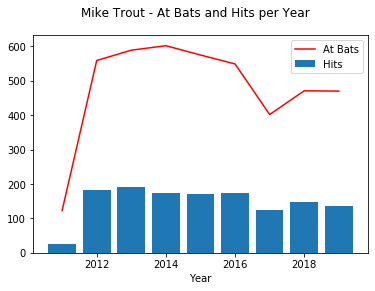

In [30]:
plt.xlabel('Year')
plt.suptitle('Mike Trout - At Bats and Hits per Year')
plt.plot(year, at_bats, color='red', label='At Bats')
plt.bar(year, hits, label='Hits')
plt.legend()         #makes the legend happen!
plt.show()

## Stacked Bar Chart

<strong> 22. </strong> We can stack bar charts on top of eachother

In this chart, I am literally stacking home runs on top of hits. But you can get a visual picture on the ratio of home runs to overall hits

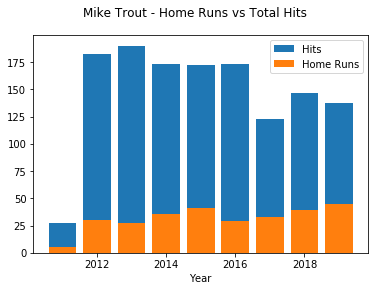

In [31]:
plt.xlabel('Year')
plt.suptitle('Mike Trout - Home Runs vs Total Hits')


plt.bar(year, hits, label='Hits')
plt.bar(year, home_runs, label='Home Runs')

plt.legend()
plt.show()

## Grouped Bar Chart

<strong> 23. </strong> In order to have my bar charts side by side, I need to move one of them to the side, and also make the bars skinnier so that everything fits.

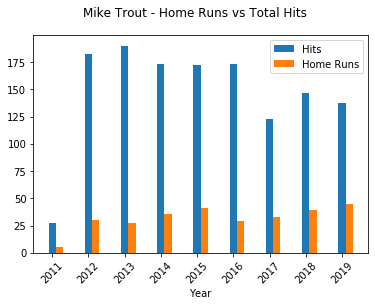

In [32]:
plt.xlabel('Year')
plt.suptitle('Mike Trout - Home Runs vs Total Hits')

plt.xticks(rotation=45)         #rotates labels by 45 degrees
plt.xticks(year)                #shows all years in label

plt.bar(year, hits, width=.2, label='Hits')
plt.bar(year+.2, home_runs, width=.2, label='Home Runs')        #moved the bars around manually
plt.legend()
plt.show()

## Labels

<strong> 24. </strong> I can add labels on my figures to show exact values. This is more complicated as you see I have included a loop. I had to google for examples of this and apply it for my own needs. This shows you that because there is so much functionality available in Matplotlib, you can customize your plot to look any way you want. But it can get complicated. Just remember, there is a huge user community on sites such as StackOverflow, personal blogs, etc for you to tap into. 

In the loop below, this is constructing the unique value of each column. I iterate through each bar and construct the text and position of each bar.

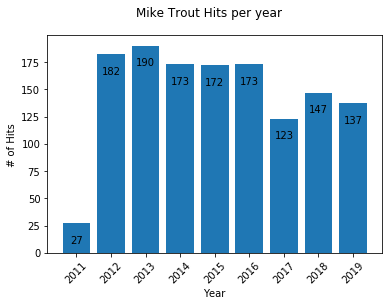

In [33]:
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.xticks(year)                #shows all years in label

plt.ylabel('# of Hits')           
plt.suptitle('Mike Trout Hits per year')

for bar in plt.bar(year, hits):        
    plt.text(bar.get_x() + .4,              #x position of label
             bar.get_height() - 20,         #y position of label
             bar.get_height(),              #actual value of label
             ha='center',
             va='bottom')


<strong> 25. </strong> Remember, you can do math on the fly with your dataframe objects! Let's create a new column on the fly and use it for our next examples. This is the amount of money Mike Trout is paid per home run.

In [34]:
cost_per_home_run = salary/home_runs

print(type(cost_per_home_run))
print(cost_per_home_run)

<class 'pandas.core.series.Series'>
0      7200.000000
1     16416.666667
2     18888.888889
3     27777.777778
4    148365.853659
5    554586.206897
6    608575.757576
7    873923.076923
8    818518.511111
dtype: float64


<strong> 26. </strong> In the following cell, I formatted the y axis labels and to do so used the Matplotlib ticker class (this is imported in our first cell with the other import statements). String formatting is not something I do often and I had to look for an example of how to do it. I knew I wanted to represent the dollar amounts in this situation, so again I googled for an answer. 

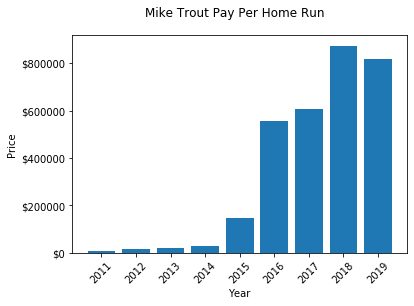

In [36]:
fig, ax = plt.subplots()

plt.xlabel('Year')
plt.xticks(rotation=45)
plt.xticks(year)

formatter = ticker.FormatStrFormatter('$%.0f')     #formatting y axis as dollar amounts
ax.yaxis.set_major_formatter(formatter)

plt.ylabel('Price')           
plt.suptitle('Mike Trout Pay Per Home Run')
plt.bar(year, cost_per_home_run)
plt.show()

## Scatter Plot

<strong> 27. </strong> Now I'll give you some other examples of random plots, just to give you more ideas of what is possible. This next cell generates 50 random numbers to use in a scatter plot.

In [37]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
print(x)
area = np.pi*3
print(area)

[0.76669499 0.78833771 0.78472715 0.66235858 0.43936344 0.00988399
 0.02086792 0.13970491 0.18291161 0.29821122 0.6458354  0.31847484
 0.77489116 0.06869075 0.60071427 0.45898618 0.23973171 0.42901424
 0.84123477 0.33991549 0.15953751 0.84522756 0.14484003 0.91781042
 0.23611271 0.5585487  0.99938983 0.93228676 0.43022817 0.39110112
 0.45235093 0.7450966  0.65256804 0.29732379 0.60455729 0.45327376
 0.19591717 0.17534473 0.37412887 0.69255227 0.96210245 0.6343131
 0.7790655  0.69770234 0.83588957 0.67845676 0.14352605 0.62495443
 0.48613531 0.4745922 ]
9.42477796076938


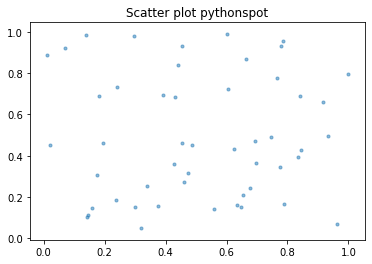

In [40]:
plt.scatter(x, y, s=area, alpha=0.5)
plt.title('Scatter plot pythonspot')
plt.show()

## Other Plotting Packages ##

Matplotlib is not your only option! You may find you want different functionality, more advanced graphics, the desire to use what you already know from other languages, or are curious to explore what else is available. Here is a brief overview of some other packages

## ggplot for python ##

[ggplot homepage](http://ggplot.yhathq.com/)

ggplot is a plotting system for Python based on R's ggplot2 and the Grammar of Graphics. The ggplot python library evolved out of the ggplot2 R-specific package. It seems to be accepted that ggplot2 (in R) is a more sophisticated graphics tool and provides more high end functionality. It is not clear to me if ggplot for python integrates all the functionality that ggplot2 has in R.


## Seaborn ##

[Seaborn homepage](https://seaborn.pydata.org/)

Seaborn is a python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. It seems to be accepted as an extension to matplotlib functionality, particularly for statistical visualization.

## Bokeh ##

[Bokeh homepage](https://docs.bokeh.org/en/latest/index.html)

Bokeh is different in that it does not depend on matplotlib and is geared toward generating visualizations in the web browser. It is meant to make interactive web visualizations.

## Which one should I use? ##

There is no right or wrong answer. It depends what you are doing, what you are familiar with, or other influences in your life. Matplotlib is a good jack of all trades package for relatively basic plotting and graphing. It also integrates nicely with numpy and pandas, two other very common scientific packages.

All these packages have large user communities and good documentation. My advice is to choose one you like and stick with it unless you find it does not have the functionality you are looking for.

Reasons to use any given data visualization package/tool in python:

- You are already familiar with it
- Your advisor/professor already likes one and you live with that decision
- You inherited code that is already using that package
- You found a code example you liked online for a specific package

## Self Help - You don't need to remember all of this! ##

Here are a few resources I use when looking for code examples, solutions, etc.

Google * Ex: "How to make dictionary python" * Ex: "python decorators"

Stack Overflow (https://stackoverflow.com/) * A question/answer site for programming questions (actually, not just programming any more) * Not only python * DO NOT just ask questions, do your research first! * Odds are very high someone has already asked your question, especially as a novice

Youtube - Corey Schafer (https://www.youtube.com/channel/UCCezIgC97PvUuR4_gbFUs5g) - If you have a question about a python programming concept, Corey Schafer has covered it

Practice Python (http://www.practicepython.org/) * Coding challenges for programmers of all levels

Python Tutor (http://pythontutor.com/) * Visualize what your code is doing step-by-step * Has limitations once you start importing libraries

TalkPython Training (https://training.talkpython.fm/) * Not free * Really awesome courses that help you get "real world" project experience